## DAB200 -- Graded Lab 2

In this lab, you will gain some experience in converting non-numeric features in a dataset to numeric so they can be used in a machine learning model.

**Target**: to predict `Comb Unadj FE - Conventional Fuel`

**Note**: There may be other "features" similar to the target, so these need to be removed from the data.

**Data set**: make sure you use the data assigned to your group!

| Groups | Data set |
| :-: | :-: |
| 1-4 | veh15.csv |
| 5-7 | veh16.csv |
| 8-10 | veh17.csv |
| 11-13 | veh18.csv |
| 14-16 | veh19.csv |

**Important Notes:**
- Use [Chapter 6](https://mlbook.explained.ai/catvars.html) of the textbook as a **guide**:
     - you only need to use **random forest** models;
- Code submitted for this lab should be:
     - error free
         - to make sure this is the case, before submitting, close all Jupyter notebooks, exit Anaconda, reload the lab notebook and execute all cells
     - final code
         - this means that I don't want to see every piece of code you try as you work through this lab but only the final code; only the code that fulfills the objective
- Use the **out-of-bag score** to evaluate models
     - Read Section 5.2 carefully so that you use this method properly
     - The oob score that you provide should be the average of 10 runs
- Don't make assumptions!


### Part 0

Please provide the following information:
 - Group Number - 8 
 - Group Members
     - Vishant Bhatia (0798567)
     - Tulaib Bin Ayyub (0789141)
     - Faizal Akram Shaikh (0816124)|
     - Mahima Mehandiratta (0801962)


     

### Part 1 - Create and evaluate an initial model

In this part you should: 
 - read in the data
 - isolate all numeric features from original data set
 - verify there are no missing values
 - create and evaluate a baseline model 

#### Code (15 marks)

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from rfpimp import *
import math 
import category_encoders as ce

In [2]:
df_veh = pd.read_csv("veh17.csv")

df_veh.head().T

,0,1,2,3,4
Eng Displ,3.5,1.8,6.0,6.0,5.2
# Cyl,6,4,12,12,10
Comb Unadj FE - Conventional Fuel,29.3561,34.4702,18.1901,15.415,21.0869
# Gears,9,6,7,7,7
Max Ethanol % - Gasoline,10.0,10.0,10.0,10.0,15.0
Intake Valves Per Cyl,2,2,2,2,2
Exhaust Valves Per Cyl,2,2,2,2,2
Var Valve Lift?,N,N,N,N,Y
Fuel Metering Sys Desc,Spark Ignition Direct Injection,Spark Ignition Direct Injection,Multipoint/sequential fuel injection,Multipoint/sequential fuel injection,Spark Ignition direct & ported injection
Stop/Start System (Engine Management System) Description,Yes,No,No,No,No


In [3]:
df_veh.shape

(1121, 12)

In [4]:
df_veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 12 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Eng Displ                                                  1121 non-null   float64
 1   # Cyl                                                      1121 non-null   int64  
 2   Comb Unadj FE - Conventional Fuel                          1121 non-null   float64
 3   # Gears                                                    1121 non-null   int64  
 4   Max Ethanol % - Gasoline                                   1121 non-null   float64
 5   Intake Valves Per Cyl                                      1121 non-null   int64  
 6   Exhaust Valves Per Cyl                                     1121 non-null   int64  
 7   Var Valve Lift?                                            1121 non-null   object 
 8   Fuel Met

In [5]:
df_veh.describe()

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,3.118287,5.627119,30.760277,6.647636,15.686887,1.932203,1.925067
std,1.336932,1.941128,8.501725,1.486792,16.512201,0.251509,0.263401
min,0.900000,3.000000,14.236300,1.000000,10.000000,1.000000,1.000000
25%,2.000000,4.000000,24.796100,6.000000,10.000000,2.000000,2.000000
50%,3.000000,6.000000,29.726200,6.000000,10.000000,2.000000,2.000000
75%,3.600000,6.000000,34.923800,8.000000,15.000000,2.000000,2.000000
max,6.800000,12.000000,80.847200,10.000000,85.000000,2.000000,2.000000


In [6]:
df_veh['# Cyl'].unique()

array([ 6,  4, 12, 10,  8,  3,  5], dtype=int64)

In [7]:
df_veh['# Gears'].unique()

array([ 9,  6,  7,  8,  5, 10,  1,  4], dtype=int64)

In [8]:
df_veh['Max Ethanol % - Gasoline'].unique()

array([10., 15., 85.])

In [9]:
df_veh['Intake Valves Per Cyl'].unique()

array([2, 1], dtype=int64)

In [10]:
df_veh['Exhaust Valves Per Cyl'].unique()

array([2, 1], dtype=int64)

#### Checking for Null Values in the dataset

In [11]:
df_veh.isnull().sum()

Eng Displ                                                    0
# Cyl                                                        0
Comb Unadj FE - Conventional Fuel                            0
# Gears                                                      0
Max Ethanol % - Gasoline                                     0
Intake Valves Per Cyl                                        0
Exhaust Valves Per Cyl                                       0
Var Valve Lift?                                              0
Fuel Metering Sys Desc                                       0
Stop/Start System (Engine Management System)  Description    0
Air Aspiration Method Desc                                   0
Label Recalc?                                                0
dtype: int64

#### There are no Null Values in our dataset 

In [12]:
def evaluate(X,y):
    oob_score = []
    n = []
    h = []
    for i in range(10):
        rf = RandomForestRegressor(n_estimators=100,n_jobs=-1,oob_score=True)
        rf.fit(X,y)
        oob_score.append(round(rf.oob_score_,5))
        n.append(rfnnodes(rf))
        h.append(np.median(rfmaxdepths(rf)))
        #print(round(rf.score(X,y),6))
        print(f'OOB R^2 is {oob_score[i]:.5f} using {n[i]:d} tree nodes with {h[i]} median tree depth')
    print("--------------------------------------------------------------------------------------")
    print(f'Average of OOB R^2 is {np.mean(oob_score):.5f} using average {math.trunc(round(np.mean(n),0))} tree nodes with average {round(np.mean(h),2)} median tree depth')
    return rf, np.mean(oob_score)
    

In [13]:
def showimp(rf,X,y):
    feature = list(X.columns)
    #feature.remove('Eng Displ')
    #feature.remove('# Gears')
    #feature += [['Eng Displ','# Gears']]
    I = importances(rf,X,y,features=feature)
    plot_importances(I,color='#4575b4')

In [14]:
 num_features = ['Eng Displ','# Cyl','# Gears','Max Ethanol % - Gasoline','Intake Valves Per Cyl','Exhaust Valves Per Cyl']

In [15]:
# Baseline evaluation 
X = df_veh[num_features]
y = df_veh['Comb Unadj FE - Conventional Fuel']


In [16]:
rf_baseline,oob_score_baseline = evaluate(X,y)

OOB R^2 is 0.73804 using 28226 tree nodes with 13.0 median tree depth
OOB R^2 is 0.74068 using 28266 tree nodes with 13.0 median tree depth
OOB R^2 is 0.73593 using 28418 tree nodes with 13.0 median tree depth
OOB R^2 is 0.73719 using 28316 tree nodes with 13.0 median tree depth
OOB R^2 is 0.73655 using 28294 tree nodes with 13.0 median tree depth
OOB R^2 is 0.73823 using 28164 tree nodes with 13.0 median tree depth
OOB R^2 is 0.74048 using 28226 tree nodes with 13.0 median tree depth
OOB R^2 is 0.73145 using 28258 tree nodes with 13.0 median tree depth
OOB R^2 is 0.73655 using 28280 tree nodes with 13.0 median tree depth
OOB R^2 is 0.73987 using 28402 tree nodes with 13.0 median tree depth
--------------------------------------------------------------------------------------
Average of OOB R^2 is 0.73750 using average 28285 tree nodes with average 13.0 median tree depth


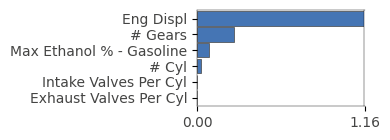

In [16]:
showimp(rf_baseline,X,y)

#### Question (5 marks)

Explain the purpose of creating a baseline model. 

### We are creating the baseline model because:
#### In a machine learning project, a baseline model is a simple model that serves as a reference or a minimum target for data scientists. Its purpose is to interpret output of a trained model . Baseline models have predictive values. However, their participation is essential for numerous reasons:
#### Baseline model act as a benchmark for our model.
#### Baseline models indicate if your data is adequate for a machine learning task or not.
#### Baseline model helps you to analyze your data better.

#### A baseline model cannot function effectively if its reported metrics change each time it is run. It means just setting a random_state or seed is a proper way to deal with baseline model and randomness.

### Part 2 - Convert non-numeric features to numeric

In this part you should: 
 - convert **all** non-numeric features to numeric
 - one of the conversions should use **one-hot encoding**
 - create **one new feature** by combining 2 or more of the existing features
 
#### Code (25 marks)

In [17]:
df_veh_copy = df_veh.copy()

In [18]:
df_veh_copy.head().T

,0,1,2,3,4
Eng Displ,3.5,1.8,6.0,6.0,5.2
# Cyl,6,4,12,12,10
Comb Unadj FE - Conventional Fuel,29.3561,34.4702,18.1901,15.415,21.0869
# Gears,9,6,7,7,7
Max Ethanol % - Gasoline,10.0,10.0,10.0,10.0,15.0
Intake Valves Per Cyl,2,2,2,2,2
Exhaust Valves Per Cyl,2,2,2,2,2
Var Valve Lift?,N,N,N,N,Y
Fuel Metering Sys Desc,Spark Ignition Direct Injection,Spark Ignition Direct Injection,Multipoint/sequential fuel injection,Multipoint/sequential fuel injection,Spark Ignition direct & ported injection
Stop/Start System (Engine Management System) Description,Yes,No,No,No,No


#### We should look at the remaining features which are not numerical

In [19]:
nonnum_col = [col for col in df_veh.columns.tolist() if col not in num_features  + ['Comb Unadj FE - Conventional Fuel']]

In [20]:
nonnum_col

['Var Valve Lift?',
 'Fuel Metering Sys Desc',
 'Stop/Start System (Engine Management System)  Description',
 'Air Aspiration Method Desc',
 'Label Recalc?']

In [21]:
df_veh_nonnum = df_veh_copy[nonnum_col]
df_veh_nonnum.head()

,Var Valve Lift?,Fuel Metering Sys Desc,Stop/Start System (Engine Management System) Description,Air Aspiration Method Desc,Label Recalc?
0,N,Spark Ignition Direct Injection,Yes,Turbocharged,N
1,N,Spark Ignition Direct Injection,No,Turbocharged,N
2,N,Multipoint/sequential fuel injection,No,Naturally Aspirated,N
3,N,Multipoint/sequential fuel injection,No,Naturally Aspirated,N
4,Y,Spark Ignition direct & ported injection,No,Naturally Aspirated,N


In [22]:
df_veh_nonnum.nunique()

Var Valve Lift?                                              2
Fuel Metering Sys Desc                                       3
Stop/Start System (Engine Management System)  Description    2
Air Aspiration Method Desc                                   4
Label Recalc?                                                2
dtype: int64

In [23]:
df_veh_copy['Var Valve Lift?'].unique()

array(['N', 'Y'], dtype=object)

In [24]:
df_veh_copy['Fuel Metering Sys Desc'].unique()

array(['Spark Ignition Direct Injection',
       'Multipoint/sequential fuel injection',
       'Spark Ignition direct & ported injection'], dtype=object)

In [25]:
df_veh_copy['Stop/Start System (Engine Management System)  Description'].unique()

array(['Yes', 'No'], dtype=object)

In [26]:
df_veh_copy['Air Aspiration Method Desc'].unique()

array(['Turbocharged', 'Naturally Aspirated', 'Supercharged',
       'Turbocharged+Supercharged'], dtype=object)

In [27]:
df_veh_copy['Label Recalc?'].unique()

array(['N', 'Y'], dtype=object)

We have Many things here :
1) All coloumns have limited unique values, maximum - 4.
2) We can use encoders to convert these unique values to numerical values.
3) We can also use One-Hot Encoder (atleast in one column) as we have limited unique values.
   It will not increase complexity of model.
4) Last thing which we notice is that, there is no ordinal column. 

In [28]:
df_veh_copy.head()

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Var Valve Lift?,Fuel Metering Sys Desc,Stop/Start System (Engine Management System) Description,Air Aspiration Method Desc,Label Recalc?
0,3.5,6,29.3561,9,10.0,2,2,N,Spark Ignition Direct Injection,Yes,Turbocharged,N
1,1.8,4,34.4702,6,10.0,2,2,N,Spark Ignition Direct Injection,No,Turbocharged,N
2,6.0,12,18.1901,7,10.0,2,2,N,Multipoint/sequential fuel injection,No,Naturally Aspirated,N
3,6.0,12,15.4150,7,10.0,2,2,N,Multipoint/sequential fuel injection,No,Naturally Aspirated,N
4,5.2,10,21.0869,7,15.0,2,2,Y,Spark Ignition direct & ported injection,No,Naturally Aspirated,N


In [29]:
encoder = ce.OrdinalEncoder(mapping=[{'col':'Var Valve Lift?', 'mapping':{'N':0,'Y':1}}])
encoder.fit(df_veh_copy["Var Valve Lift?"])
df_veh_copy["Var Valve Lift?"] = encoder.transform(df_veh_copy["Var Valve Lift?"])
#X.head(10)

In [30]:
encoder = ce.OrdinalEncoder(mapping=[{'col':'Stop/Start System (Engine Management System)  Description', 'mapping':{'No':0,'Yes':1}}])
encoder.fit(df_veh_copy["Stop/Start System (Engine Management System)  Description"])
df_veh_copy["Stop/Start System (Engine Management System)  Description"] = encoder.transform(df_veh_copy["Stop/Start System (Engine Management System)  Description"])

In [31]:
encoder = ce.OrdinalEncoder(mapping=[{'col':'Label Recalc?', 'mapping':{'N':0,'Y':1}}])
encoder.fit(df_veh_copy["Label Recalc?"])
df_veh_copy["Label Recalc?"] = encoder.transform(df_veh_copy["Label Recalc?"])

In [32]:
df_veh_copy.head(10)

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Var Valve Lift?,Fuel Metering Sys Desc,Stop/Start System (Engine Management System) Description,Air Aspiration Method Desc,Label Recalc?
0,3.5,6,29.3561,9,10.0,2,2,0,Spark Ignition Direct Injection,1,Turbocharged,0
1,1.8,4,34.4702,6,10.0,2,2,0,Spark Ignition Direct Injection,0,Turbocharged,0
2,6.0,12,18.1901,7,10.0,2,2,0,Multipoint/sequential fuel injection,0,Naturally Aspirated,0
3,6.0,12,15.4150,7,10.0,2,2,0,Multipoint/sequential fuel injection,0,Naturally Aspirated,0
4,5.2,10,21.0869,7,15.0,2,2,1,Spark Ignition direct & ported injection,0,Naturally Aspirated,0
5,5.2,10,21.0869,7,15.0,2,2,1,Spark Ignition direct & ported injection,0,Naturally Aspirated,0
6,2.0,4,33.4616,6,15.0,2,2,1,Spark Ignition Direct Injection,0,Turbocharged,0
7,6.2,8,20.4957,8,10.0,1,1,0,Spark Ignition Direct Injection,0,Supercharged,0
8,6.2,8,24.0284,8,10.0,1,1,0,Spark Ignition Direct Injection,0,Naturally Aspirated,0
9,6.2,8,22.6242,7,10.0,1,1,0,Spark Ignition Direct Injection,0,Supercharged,0


In [33]:
encoder = ce.OneHotEncoder(cols = ['Fuel Metering Sys Desc','Air Aspiration Method Desc'])
encoder.fit(df_veh_copy)
df_veh_copy = encoder.transform(df_veh_copy)



In [34]:
df_veh_copy.head(10).T

,0,1,2,3,4,5,6,7,8,9
Eng Displ,3.5000,1.8000,6.0000,6.000,5.2000,5.2000,2.0000,6.2000,6.2000,6.2000
# Cyl,6.0000,4.0000,12.0000,12.000,10.0000,10.0000,4.0000,8.0000,8.0000,8.0000
Comb Unadj FE - Conventional Fuel,29.3561,34.4702,18.1901,15.415,21.0869,21.0869,33.4616,20.4957,24.0284,22.6242
# Gears,9.0000,6.0000,7.0000,7.000,7.0000,7.0000,6.0000,8.0000,8.0000,7.0000
Max Ethanol % - Gasoline,10.0000,10.0000,10.0000,10.000,15.0000,15.0000,15.0000,10.0000,10.0000,10.0000
Intake Valves Per Cyl,2.0000,2.0000,2.0000,2.000,2.0000,2.0000,2.0000,1.0000,1.0000,1.0000
Exhaust Valves Per Cyl,2.0000,2.0000,2.0000,2.000,2.0000,2.0000,2.0000,1.0000,1.0000,1.0000
Var Valve Lift?,0.0000,0.0000,0.0000,0.000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000
Fuel Metering Sys Desc_1,1.0000,1.0000,0.0000,0.000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000
Fuel Metering Sys Desc_2,0.0000,0.0000,1.0000,1.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [35]:
# we want to change columns name whcih comes from one-hot encoding
change_column_names = { 'Fuel Metering Sys Desc_1':'Fuel Metering Sys is Spark Ignition Direct Injection?', 
                        'Fuel Metering Sys Desc_2':'Fuel Metering Sys is Multipoint/sequential fuel injection?',
                        'Fuel Metering Sys Desc_3':'Fuel Metering Sys is Spark Ignition direct & ported injection?',
                        'Air Aspiration Method Desc_1':'Air Aspiration Method is Turbocharged?',
                        'Air Aspiration Method Desc_2':'Air Aspiration Method is Naturally Aspirated?',
                        'Air Aspiration Method Desc_3':'Air Aspiration Method is Supercharged?',
                        'Air Aspiration Method Desc_4':'Air Aspiration Method is Turbocharged+Supercharged?'}

In [36]:
# Assigning changed columns to database 
df_veh_copy.rename(columns = change_column_names, inplace =True)

In [37]:
df_veh_copy.head().T

,0,1,2,3,4
Eng Displ,3.5000,1.8000,6.0000,6.000,5.2000
# Cyl,6.0000,4.0000,12.0000,12.000,10.0000
Comb Unadj FE - Conventional Fuel,29.3561,34.4702,18.1901,15.415,21.0869
# Gears,9.0000,6.0000,7.0000,7.000,7.0000
Max Ethanol % - Gasoline,10.0000,10.0000,10.0000,10.000,15.0000
Intake Valves Per Cyl,2.0000,2.0000,2.0000,2.000,2.0000
Exhaust Valves Per Cyl,2.0000,2.0000,2.0000,2.000,2.0000
Var Valve Lift?,0.0000,0.0000,0.0000,0.000,1.0000
Fuel Metering Sys is Spark Ignition Direct Injection?,1.0000,1.0000,0.0000,0.000,0.0000
Fuel Metering Sys is Multipoint/sequential fuel injection?,0.0000,0.0000,1.0000,1.000,0.0000


#### Now we will make a new feature by combining two features

In [38]:
df_veh_copy["Total no. of Valves"] = (df_veh_copy["Intake Valves Per Cyl"] + df_veh_copy["Exhaust Valves Per Cyl"]) * df_veh_copy["# Cyl"] 

In [39]:
df_veh_copy.head().T

,0,1,2,3,4
Eng Displ,3.5000,1.8000,6.0000,6.000,5.2000
# Cyl,6.0000,4.0000,12.0000,12.000,10.0000
Comb Unadj FE - Conventional Fuel,29.3561,34.4702,18.1901,15.415,21.0869
# Gears,9.0000,6.0000,7.0000,7.000,7.0000
Max Ethanol % - Gasoline,10.0000,10.0000,10.0000,10.000,15.0000
Intake Valves Per Cyl,2.0000,2.0000,2.0000,2.000,2.0000
Exhaust Valves Per Cyl,2.0000,2.0000,2.0000,2.000,2.0000
Var Valve Lift?,0.0000,0.0000,0.0000,0.000,1.0000
Fuel Metering Sys is Spark Ignition Direct Injection?,1.0000,1.0000,0.0000,0.000,0.0000
Fuel Metering Sys is Multipoint/sequential fuel injection?,0.0000,0.0000,1.0000,1.000,0.0000


In [40]:
df_veh_new = df_veh_copy.copy()

In [41]:
df_veh_new.head().T

,0,1,2,3,4
Eng Displ,3.5000,1.8000,6.0000,6.000,5.2000
# Cyl,6.0000,4.0000,12.0000,12.000,10.0000
Comb Unadj FE - Conventional Fuel,29.3561,34.4702,18.1901,15.415,21.0869
# Gears,9.0000,6.0000,7.0000,7.000,7.0000
Max Ethanol % - Gasoline,10.0000,10.0000,10.0000,10.000,15.0000
Intake Valves Per Cyl,2.0000,2.0000,2.0000,2.000,2.0000
Exhaust Valves Per Cyl,2.0000,2.0000,2.0000,2.000,2.0000
Var Valve Lift?,0.0000,0.0000,0.0000,0.000,1.0000
Fuel Metering Sys is Spark Ignition Direct Injection?,1.0000,1.0000,0.0000,0.000,0.0000
Fuel Metering Sys is Multipoint/sequential fuel injection?,0.0000,0.0000,1.0000,1.000,0.0000


#### Explanation (25 marks)

Please provide an explanation for each conversion from non-numeric to numeric and state why this conversion is appropriate. Please also provide an explanation of the new feature created.  

### We converted all categorical features to numerical with the help of OrdinalEncoder and OneHotEncoder. We used OrdinalEncoders so that we can assign or map numerical values to categorical values of our own choice, in this case we map  'y' or 'yes' to 1 and 'n' or 'no' to 0. But on other side we used OneHotEncoder because there are max 4 categorical values, so it will not increase complexity of our model. Below are feature names for each Ordinal and OneHot.
####  OrdinalEncoder
     - Var Valve Lift?
     - Stop/Start System (Engine Management System)  Description
     - Label Recalc?
     
####  OneHotEncoder
     - Fuel Metering Sys Desc
     - Air Aspiration Method Desc

### We created new feature 'Total no. of Valves' which is addition of 'Intake Valves Per Cyl' and 'Exhaust Valves Per Cyl'  and multipication of '# Cyl'. This feature tell us total number of valves for each record.

### Part 3 - Create and evaluate a final model

In this part you should:
 - create and evaluate a model using all the features from Parts 1 and 2 above 

#### Code (15 marks)

### After converting the categorical features into numerical features by using various encoding methods we are creating a new model and testing it against our baseline model to see what impact the categorical features have on our model.

In [42]:
df_veh_new.head().T

,0,1,2,3,4
Eng Displ,3.5000,1.8000,6.0000,6.000,5.2000
# Cyl,6.0000,4.0000,12.0000,12.000,10.0000
Comb Unadj FE - Conventional Fuel,29.3561,34.4702,18.1901,15.415,21.0869
# Gears,9.0000,6.0000,7.0000,7.000,7.0000
Max Ethanol % - Gasoline,10.0000,10.0000,10.0000,10.000,15.0000
Intake Valves Per Cyl,2.0000,2.0000,2.0000,2.000,2.0000
Exhaust Valves Per Cyl,2.0000,2.0000,2.0000,2.000,2.0000
Var Valve Lift?,0.0000,0.0000,0.0000,0.000,1.0000
Fuel Metering Sys is Spark Ignition Direct Injection?,1.0000,1.0000,0.0000,0.000,0.0000
Fuel Metering Sys is Multipoint/sequential fuel injection?,0.0000,0.0000,1.0000,1.000,0.0000


In [43]:
X_final=df_veh_new.drop(['Comb Unadj FE - Conventional Fuel'],axis=1)
y_final=df_veh_new['Comb Unadj FE - Conventional Fuel']

In [44]:
print(X_final.shape,y_final.shape)

(1121, 17) (1121,)


In [45]:
rf_final,oob_score_final = evaluate(X_final,y_final)

OOB R^2 is 0.88919 using 47276 tree nodes with 14.0 median tree depth
OOB R^2 is 0.89203 using 47250 tree nodes with 14.5 median tree depth
OOB R^2 is 0.89064 using 47214 tree nodes with 14.5 median tree depth
OOB R^2 is 0.89165 using 47266 tree nodes with 14.0 median tree depth
OOB R^2 is 0.89229 using 47278 tree nodes with 15.0 median tree depth
OOB R^2 is 0.89041 using 47342 tree nodes with 14.0 median tree depth
OOB R^2 is 0.89030 using 47266 tree nodes with 15.0 median tree depth
OOB R^2 is 0.89075 using 47264 tree nodes with 14.0 median tree depth
OOB R^2 is 0.89141 using 47266 tree nodes with 14.0 median tree depth
OOB R^2 is 0.89183 using 47406 tree nodes with 15.0 median tree depth
--------------------------------------------------------------------------------------
Average of OOB R^2 is 0.89105 using average 47283 tree nodes with average 14.4 median tree depth


C:\Users\visha\anaconda3\envs\DAB200\lib\site-packages\rfpimp.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


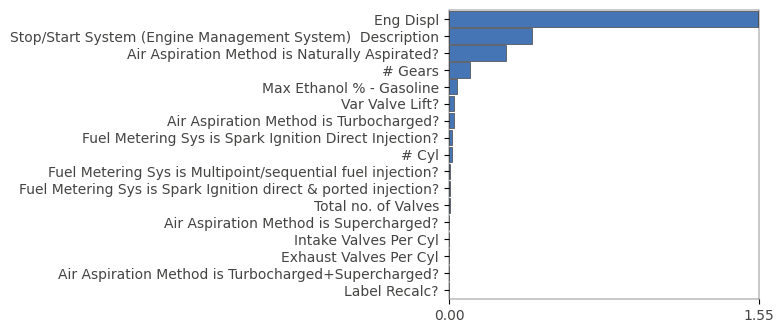

In [46]:
showimp(rf_final,X_final,y_final)

### The Final R^2 score is close to 1.0 which is a good score. As we know if our R^2 value is 0, it does not do any better than just guess the average of 'Comb Unadj FE - Conventional Fuel' and if it is negative it means it is even worse than predicting the average value. 

### Our baseline model had an average R^2 score near about 0.73812, thus we can say that the accuracy for our new model has significantly increased, the only cost to this accuracy boost is an increase in the number of tree nodes. but there is not much difference between the decision tree height.

### The tree height matters as it determines the path taken by our model to reach to the prediction and thus determines the prediction speed, but there is not much difference between the decision tree height which is 13.0 and 14.4 for our baseline and new model respectively.

### Part 4 - Feature importances and comparison (10 marks)

In this part you should:
 - calculate the percent difference between the results of Part 1 and Part 3 (make sure you are using the correct formula for percent difference) 
 - based on the percent difference, state whether or not the results of Part 3 are an improvement over the results of Part 1
 - use the `rfpimp` package to calculate and display the feature importances for all features

In [51]:
# Calculating both actual and relative percentage diff
actual_percent_diff = (abs(oob_score_final - oob_score_baseline) / oob_score_baseline) * 100
relative_percent_diff = (abs(oob_score_final - oob_score_baseline) / (oob_score_final + oob_score_baseline) / 2) * 100

print("The actual percentage difference is: ", f"{actual_percent_diff:.2f} %")
print("The relative percentage difference is: ", f"{relative_percent_diff:.2f} %")

The actual percentage difference is:  20.60 %
The relative percentage difference is:  4.67 %


In [48]:
feature_importances = pd.Series(rf_final.feature_importances_, index=X_final.columns)
feature_importances

Eng Displ                                                         0.663563
# Cyl                                                             0.052049
# Gears                                                           0.087625
Max Ethanol % - Gasoline                                          0.020830
Intake Valves Per Cyl                                             0.000629
Exhaust Valves Per Cyl                                            0.000560
Var Valve Lift?                                                   0.011200
Fuel Metering Sys is Spark Ignition Direct Injection?             0.008521
Fuel Metering Sys is Multipoint/sequential fuel injection?        0.004831
Fuel Metering Sys is Spark Ignition direct & ported injection?    0.003215
Stop/Start System (Engine Management System)  Description         0.095405
Air Aspiration Method is Turbocharged?                            0.014785
Air Aspiration Method is Naturally Aspirated?                     0.031558
Air Aspiration Method is 

#### Now we can see that rfpimp was giving wrong answer but when we calculate importances with pandas it is giving accurate answer. Now we will sort it. 

In [49]:
print(feature_importances.sort_values())

Label Recalc?                                                     0.000069
Air Aspiration Method is Turbocharged+Supercharged?               0.000227
Exhaust Valves Per Cyl                                            0.000560
Intake Valves Per Cyl                                             0.000629
Air Aspiration Method is Supercharged?                            0.001258
Fuel Metering Sys is Spark Ignition direct & ported injection?    0.003215
Total no. of Valves                                               0.003675
Fuel Metering Sys is Multipoint/sequential fuel injection?        0.004831
Fuel Metering Sys is Spark Ignition Direct Injection?             0.008521
Var Valve Lift?                                                   0.011200
Air Aspiration Method is Turbocharged?                            0.014785
Max Ethanol % - Gasoline                                          0.020830
Air Aspiration Method is Naturally Aspirated?                     0.031558
# Cyl                    

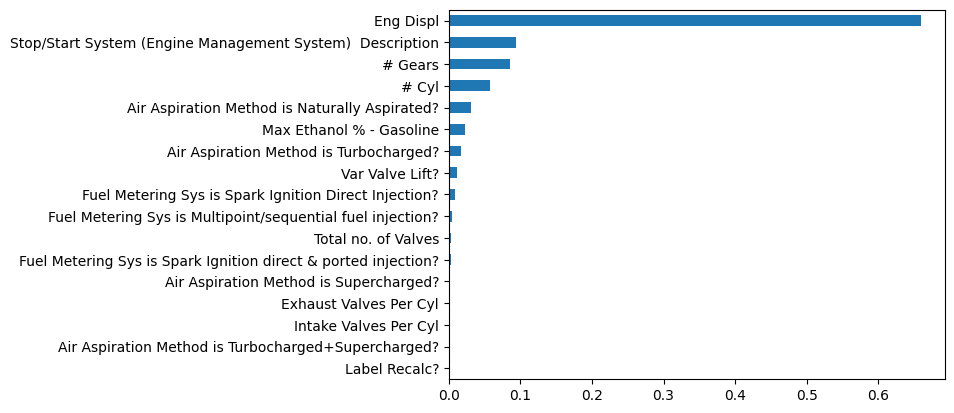

In [59]:
feature_importances.sort_values().plot(kind = 'barh')
plt.show()

### Therefore, the percent difference between the results of Part 1 and Part 3 is near about 20 %. Since the percent difference is positive, we can say that the result of Part 3 is an improvement of the result of Part 1.

#### Question (5 marks)

Based on the feature importances, are any features that you think should be removed from the data set.  Why do you think these features should be removed? 

### From above we can conclude that features like Eng Displ ,Stop/Start System (Engine Management System)  Description (total 10 features) etc having highest importances value are the most influenced towards target value and we will keep these features as compare to other fatures such as Label Recalc? ,Air Aspiration Method is Turbocharged+Supercharged?  etc   (which are near or below zero, total are 7 features) having least importances value towards target value. So, we can remove these features.